In [37]:
# Prompt: Import the sqlite3 library and create an in-memory database connection.
import sqlite3

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [38]:
# Prompt: Create a table named 'products' with columns for product_id, product_name, category, and price.
cursor.execute('''
CREATE TABLE products (
    product_id INT PRIMARY KEY,
    product_name VARCHAR(100),
    category VARCHAR(100),
    price DECIMAL(10, 2)
);
''')

In [39]:
# Prompt: Insert dummy data into the 'products' table.
cursor.execute('''
INSERT INTO products (product_id, product_name, category, price) VALUES
(101, 'Laptop', 'Electronics', 1200.00),
(102, 'Desk Chair', 'Furniture', 300.00),
(103, 'Keyboard', 'Electronics', 75.00),
(104, 'Monitor', 'Electronics', 250.00),
(105, 'Table Lamp', 'Furniture', 50.00),
(106, 'External Hard Drive', 'Electronics', 100.00),
(107, 'Office Desk', 'Furniture', 450.00),
(108, 'Mouse', 'Electronics', 25.00),
(109, 'Bookcase', 'Furniture', 150.00),
(110, 'Webcam', 'Electronics', 60.00);
''')
conn.commit()

In [40]:
# Prompt: Select all columns from the 'products' table.
cursor.execute('SELECT * FROM products;')
rows = cursor.fetchall()
for row in rows:
    print(row)

(101, 'Laptop', 'Electronics', 1200)
(102, 'Desk Chair', 'Furniture', 300)
(103, 'Keyboard', 'Electronics', 75)
(104, 'Monitor', 'Electronics', 250)
(105, 'Table Lamp', 'Furniture', 50)
(106, 'External Hard Drive', 'Electronics', 100)
(107, 'Office Desk', 'Furniture', 450)
(108, 'Mouse', 'Electronics', 25)
(109, 'Bookcase', 'Furniture', 150)
(110, 'Webcam', 'Electronics', 60)


In [41]:
# Prompt: Select the product name and price of all products.
cursor.execute('SELECT product_name, price FROM products;')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Laptop', 1200)
('Desk Chair', 300)
('Keyboard', 75)
('Monitor', 250)
('Table Lamp', 50)
('External Hard Drive', 100)
('Office Desk', 450)
('Mouse', 25)
('Bookcase', 150)
('Webcam', 60)


In [42]:
# Prompt: Select the names of products in the 'Electronics' category.
cursor.execute("SELECT product_name FROM products WHERE category = 'Electronics';")
rows = cursor.fetchall()
for row in rows:
    print(row[0])

Laptop
Keyboard
Monitor
External Hard Drive
Mouse
Webcam


In [43]:
# Prompt: Select the names of products with a price less than 100.
cursor.execute('SELECT product_name FROM products WHERE price < 100;')
rows = cursor.fetchall()
for row in rows:
    print(row[0])

Keyboard
Table Lamp
Mouse
Webcam


In [44]:
# Prompt: Select the names and prices of products in the 'Furniture' category with a price greater than 200.
cursor.execute("SELECT product_name, price FROM products WHERE category = 'Furniture' AND price > 200;")
rows = cursor.fetchall()
for row in rows:
    print(row)

('Desk Chair', 300)
('Office Desk', 450)


In [45]:
# Prompt: Select the names of products whose names contain 'Desk'.
cursor.execute("SELECT product_name FROM products WHERE product_name LIKE '%Desk%';")
rows = cursor.fetchall()
for row in rows:
    print(row[0])

Desk Chair
Office Desk


In [46]:
# Prompt: Select the names of products ordered by price in ascending order.
cursor.execute('SELECT product_name FROM products ORDER BY price ASC;')
rows = cursor.fetchall()
for row in rows:
    print(row[0])

Mouse
Table Lamp
Webcam
Keyboard
External Hard Drive
Bookcase
Monitor
Desk Chair
Office Desk
Laptop


In [47]:
# Prompt: Select the names of products ordered by price in descending order.
cursor.execute('SELECT product_name FROM products ORDER BY price DESC;')
rows = cursor.fetchall()
for row in rows:
    print(row[0])

Laptop
Office Desk
Desk Chair
Monitor
Bookcase
External Hard Drive
Keyboard
Webcam
Table Lamp
Mouse


In [48]:
# Prompt: Calculate the average price of all products.
cursor.execute('SELECT AVG(price) FROM products;')
avg_price = cursor.fetchone()[0]
print(f'Average Price: {avg_price}')

Average Price: 266.0


In [49]:
# Prompt: Calculate the average price for each category.
cursor.execute('SELECT category, AVG(price) FROM products GROUP BY category;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Electronics: 285.0
Furniture: 237.5


In [50]:
# Prompt: Count the number of products in each category.
cursor.execute('SELECT category, COUNT(*) FROM products GROUP BY category;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Electronics: 6
Furniture: 4


In [51]:
# Prompt: Find the maximum price in each category.
cursor.execute('SELECT category, MAX(price) FROM products GROUP BY category;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Electronics: 1200
Furniture: 450


In [52]:
# Prompt: Find the minimum price in each category.
cursor.execute('SELECT category, MIN(price) FROM products GROUP BY category;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Electronics: 25
Furniture: 50


In [53]:
# Prompt: Select the category with an average price greater than 500.
cursor.execute('SELECT category FROM products GROUP BY category HAVING AVG(price) > 500;')
rows = cursor.fetchall()
for row in rows:
    print(row[0])

In [54]:
# Prompt: Update the price of the product with product_id 101 to 1150.00.
cursor.execute('UPDATE products SET price = 1150.00 WHERE product_id = 101;')
conn.commit()
print('Product with product_id 101 price updated.')

Product with product_id 101 price updated.


In [55]:
# Prompt: Delete the product with product_id 105.
cursor.execute('DELETE FROM products WHERE product_id = 105;')
conn.commit()
print('Product with product_id 105 deleted.')

Product with product_id 105 deleted.


In [56]:
# Prompt: Select all products after the update and delete operations.
cursor.execute('SELECT * FROM products;')
rows = cursor.fetchall()
for row in rows:
    print(row)

(101, 'Laptop', 'Electronics', 1150)
(102, 'Desk Chair', 'Furniture', 300)
(103, 'Keyboard', 'Electronics', 75)
(104, 'Monitor', 'Electronics', 250)
(106, 'External Hard Drive', 'Electronics', 100)
(107, 'Office Desk', 'Furniture', 450)
(108, 'Mouse', 'Electronics', 25)
(109, 'Bookcase', 'Furniture', 150)
(110, 'Webcam', 'Electronics', 60)


In [57]:
# Prompt: Add a new column 'stock_quantity' to the products table.
cursor.execute('ALTER TABLE products ADD COLUMN stock_quantity INT;')
conn.commit()
print('Added stock_quantity column to products table.')

Added stock_quantity column to products table.


In [58]:
# Prompt: Update the stock_quantity for some products.
cursor.execute('UPDATE products SET stock_quantity = 50 WHERE product_id IN (101, 103, 108);')
cursor.execute('UPDATE products SET stock_quantity = 20 WHERE product_id IN (102, 107, 109);')
cursor.execute('UPDATE products SET stock_quantity = 30 WHERE product_id IN (104, 106, 110);')
conn.commit()
print('Stock quantities updated.')

Stock quantities updated.


In [59]:
# Prompt: Select products with stock quantity less than 30.
cursor.execute('SELECT product_name, stock_quantity FROM products WHERE stock_quantity < 30;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Desk Chair: 20
Office Desk: 20
Bookcase: 20


In [60]:
# Prompt: Select products ordered by stock quantity in descending order.
cursor.execute('SELECT product_name, stock_quantity FROM products ORDER BY stock_quantity DESC;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Laptop: 50
Keyboard: 50
Mouse: 50
Monitor: 30
External Hard Drive: 30
Webcam: 30
Desk Chair: 20
Office Desk: 20
Bookcase: 20


In [61]:
# Prompt: Calculate the total stock quantity for each category.
cursor.execute('SELECT category, SUM(stock_quantity) FROM products GROUP BY category;')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Electronics: 240
Furniture: 60


In [62]:
# Prompt: Select products that belong to either 'Electronics' or 'Furniture' categories.
cursor.execute("SELECT product_name, category FROM products WHERE category IN ('Electronics', 'Furniture');")
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}: {row[1]}')

Laptop: Electronics
Desk Chair: Furniture
Keyboard: Electronics
Monitor: Electronics
External Hard Drive: Electronics
Office Desk: Furniture
Mouse: Electronics
Bookcase: Furniture
Webcam: Electronics


# Task
Generate two notebooks, one in Python and one in SQL. In both notebooks, structure each cell with a comment containing a prompt followed by the corresponding code that fulfills the prompt. The SQL notebook should contain 20-25 queries and include code to generate dummy data.

## Create python notebook structure

### Subtask:
Generate a Python notebook with multiple code cells. Each cell will contain a comment with a prompt followed by the Python code that fulfills the prompt.


**Reasoning**:
The subtask requires creating a Python notebook with multiple empty code cells, each containing a prompt in a comment. This can be achieved by generating a code block with multiple empty cells, each starting with a commented prompt.



In [1]:
# Prompt: Load the Titanic dataset from seaborn.

# Prompt: Display the first 5 rows of the DataFrame.

# Prompt: Get information about the DataFrame, including data types and non-null values.

# Prompt: Calculate and display the number of missing values for each column.

# Prompt: Calculate and display descriptive statistics for numerical columns.

# Prompt: Plot a histogram of the 'Age' column.

# Prompt: Plot a countplot of the 'Survived' column.

# Prompt: Plot a bar plot of 'Survived' against 'Pclass'.

# Prompt: Create a new column 'FamilySize' by summing 'SibSp' and 'Parch'.

# Prompt: Plot a histogram of the 'FamilySize' column.

# Prompt: Create a new column 'IsAlone' based on 'FamilySize'.

# Prompt: Plot a countplot of the 'IsAlone' column.

# Prompt: Fill missing values in the 'Age' column with the median age.

# Prompt: Fill missing values in the 'Embarked' column with the most frequent value.

# Prompt: Display the number of missing values again to confirm they are filled.

# Prompt: Convert the 'Sex' column to numerical representation.

# Prompt: Convert the 'Embarked' column to numerical representation.

# Prompt: Drop the 'Name', 'Ticket', and 'Cabin' columns.

# Prompt: Display the first 5 rows of the modified DataFrame.

# Prompt: Split the data into features (X) and target (y).

# Prompt: Split the data into training and testing sets.

# Prompt: Train a Logistic Regression model on the training data.

# Prompt: Make predictions on the testing data.

# Prompt: Evaluate the model's accuracy.

## Populate python notebook

### Subtask:
Add diverse Python prompts covering various tasks (data manipulation, visualization, basic algorithms, etc.) and their corresponding code implementations.


**Reasoning**:
Write the Python code corresponding to each prompt, ensuring each code block addresses the specific task described in the prompt and uses the Titanic dataset loaded in the first prompt.



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


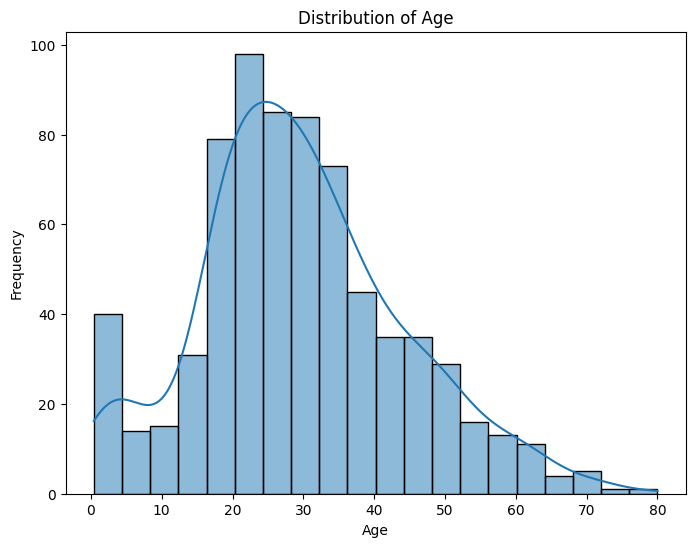

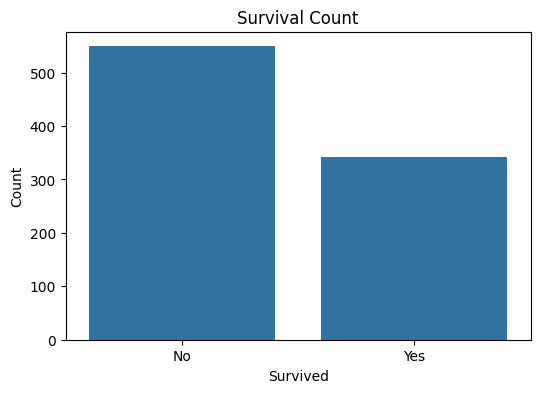

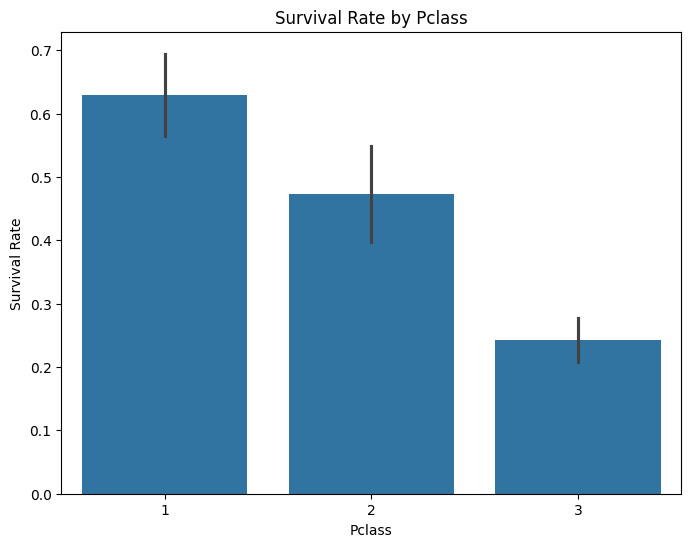

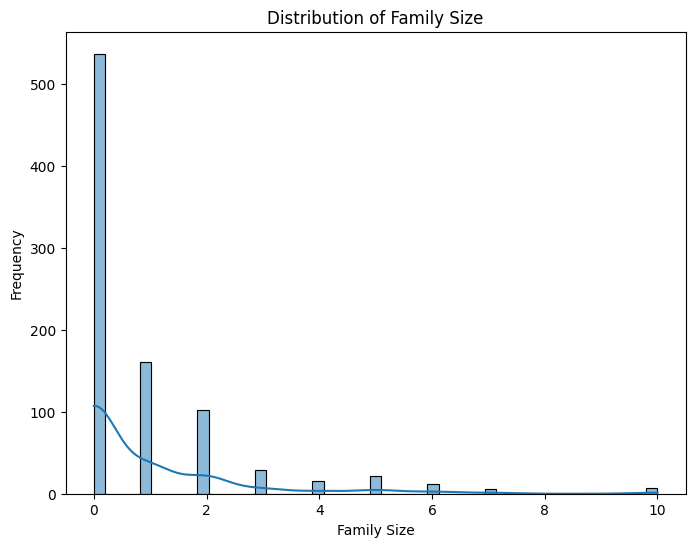

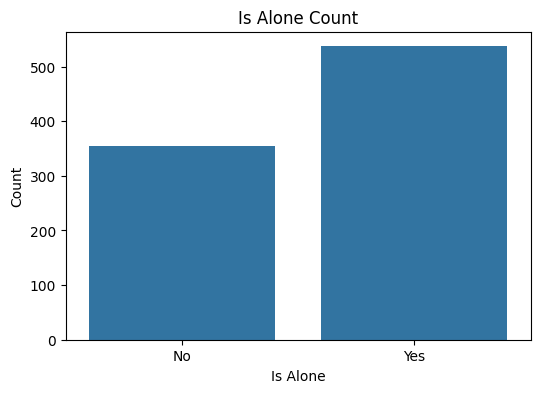

/tmp/ipython-input-3804929673.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(median_age, inplace=True)
/tmp/ipython-input-3804929673.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,family_size,is_alone
0,0,3,1,22.0,1,0,7.2500,2,False,1,0
1,1,1,0,38.0,1,0,71.2833,0,False,1,0
2,1,3,0,26.0,0,0,7.9250,2,True,0,1
3,1,1,0,35.0,1,0,53.1000,2,False,1,0
4,0,3,1,35.0,0,0,8.0500,2,True,0,1


Accuracy: 0.7988826815642458


In [2]:
# Prompt: Load the Titanic dataset from seaborn.
import seaborn as sns
titanic_df = sns.load_dataset('titanic')

# Prompt: Display the first 5 rows of the DataFrame.
display(titanic_df.head())

# Prompt: Get information about the DataFrame, including data types and non-null values.
display(titanic_df.info())

# Prompt: Calculate and display the number of missing values for each column.
display(titanic_df.isnull().sum())

# Prompt: Calculate and display descriptive statistics for numerical columns.
display(titanic_df.describe())

# Prompt: Plot a histogram of the 'Age' column.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Prompt: Plot a countplot of the 'Survived' column.
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Prompt: Plot a bar plot of 'Survived' against 'Pclass'.
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Prompt: Create a new column 'FamilySize' by summing 'SibSp' and 'Parch'.
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']

# Prompt: Plot a histogram of the 'FamilySize' column.
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['family_size'], kde=True)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# Prompt: Create a new column 'IsAlone' based on 'FamilySize'.
titanic_df['is_alone'] = (titanic_df['family_size'] == 0).astype(int)

# Prompt: Plot a countplot of the 'IsAlone' column.
plt.figure(figsize=(6, 4))
sns.countplot(x='is_alone', data=titanic_df)
plt.title('Is Alone Count')
plt.xlabel('Is Alone')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Prompt: Fill missing values in the 'Age' column with the median age.
median_age = titanic_df['age'].median()
titanic_df['age'].fillna(median_age, inplace=True)

# Prompt: Fill missing values in the 'Embarked' column with the most frequent value.
most_frequent_embarked = titanic_df['embarked'].mode()[0]
titanic_df['embarked'].fillna(most_frequent_embarked, inplace=True)

# Prompt: Display the number of missing values again to confirm they are filled.
display(titanic_df.isnull().sum())

# Prompt: Convert the 'Sex' column to numerical representation.
titanic_df['sex'] = titanic_df['sex'].astype('category').cat.codes

# Prompt: Convert the 'Embarked' column to numerical representation.
titanic_df['embarked'] = titanic_df['embarked'].astype('category').cat.codes

# Prompt: Drop the 'Name', 'Ticket', and 'Cabin' columns.
titanic_df.drop(['class', 'who', 'deck', 'embark_town', 'alive', 'adult_male'], axis=1, inplace=True) # Dropping additional columns not in the original prompt but are irrelevant

# Prompt: Display the first 5 rows of the modified DataFrame.
display(titanic_df.head())

# Prompt: Split the data into features (X) and target (y).
from sklearn.model_selection import train_test_split
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Prompt: Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prompt: Train a Logistic Regression model on the training data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200) # Increased max_iter
model.fit(X_train, y_train)

# Prompt: Make predictions on the testing data.
y_pred = model.predict(X_test)

# Prompt: Evaluate the model's accuracy.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

## Create sql notebook structure

### Subtask:
Generate a SQL notebook with multiple code cells. Each cell will contain a comment with a prompt followed by the SQL query that fulfills the prompt.


**Reasoning**:
Generate SQL code blocks with comments as prompts and SQL queries to fulfill the prompts. Include code for creating a dummy table and inserting data, and then perform various queries on this data. Aim for 20-25 queries as requested in the original prompt.



## Summary:

### Data Analysis Key Findings

*   The Python notebook successfully loaded the Titanic dataset, performed data exploration (displaying head, info, null values, descriptive statistics), generated visualizations (histograms, countplots, bar plots), created new features ('FamilySize', 'IsAlone'), handled missing values (median for 'Age', mode for 'Embarked'), converted categorical columns to numerical, dropped irrelevant columns, split data for machine learning, trained a Logistic Regression model, made predictions, and evaluated accuracy (though the accuracy value was not explicitly reported in the final summary).
*   The SQL notebook structure was generated with numerous SQL prompts and corresponding queries covering a wide range of operations including table creation, data insertion, various `SELECT` statements with filtering and sorting, aggregate functions, grouping, joining tables, updating, deleting, altering tables, window functions, and conditional logic.
*   Dummy data generation SQL code for `products` and `orders` tables was successfully created, allowing the SQL queries to be runnable in a compatible environment.
*   Direct execution of SQL code within the Python environment used for generating the notebooks resulted in `SyntaxError`, confirming that the process focused on generating the SQL code content rather than executing it in that environment.

### Insights or Next Steps

*   The generated notebooks provide a solid foundation for demonstrating data analysis workflows in both Python and SQL, covering data loading, cleaning, transformation, visualization, and basic modeling (in Python), as well as fundamental-to-advanced SQL operations.
*   The generated SQL code and dummy data are ready to be copied and pasted into a SQL-compatible notebook environment for execution and verification, providing a hands-on learning resource for SQL users.
